## i) Importing libraries and Images

#### Discontinuous detection: Contour detection and Histogram filter

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [181]:
amostra_imagem = cv2.imread('./images/rick.jpg')

In [182]:
imagem = cv2.cvtColor(amostra_imagem, cv2.COLOR_BGR2RGB)

In [183]:
imagem = cv2.resize(imagem, (256,256))

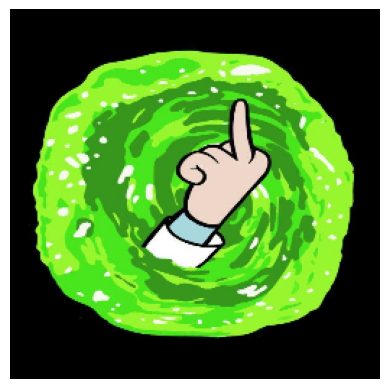

In [184]:
plt.axis('off')
plt.imshow(imagem)

## ii) Applying Image Thresholding

In [185]:
gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

In [186]:
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

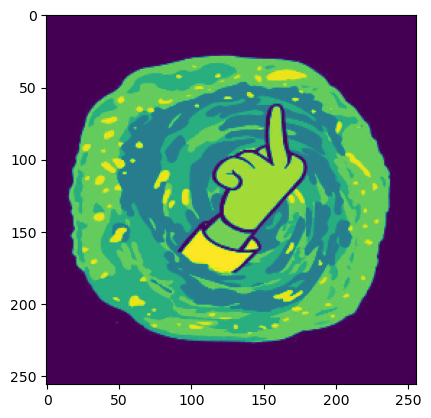

In [187]:
plt.imshow(gray)

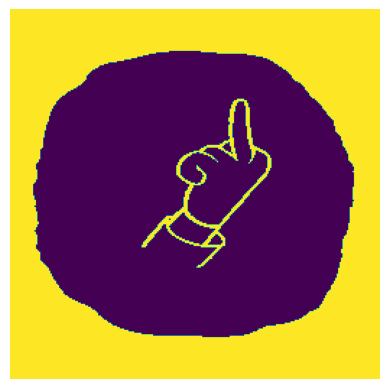

In [188]:
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
plt.axis('off')
plt.imshow(thresh)

## iii) Detecting Edges

In [189]:
#applying the edge detection
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

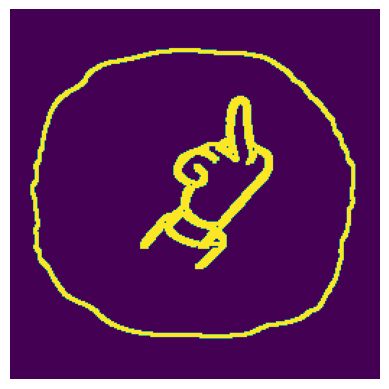

In [190]:
plt.axis('off')
plt.imshow(edges)

## iv) Detecting Contours To Create Mask

In [191]:
sorting = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]

In [192]:
sorting

array([[[110,  27]],

       [[109,  28]],

       [[101,  28]],

       [[100,  29]],

       [[ 96,  29]],

       [[ 95,  30]],

       [[ 92,  30]],

       [[ 91,  31]],

       [[ 88,  31]],

       [[ 87,  32]],

       [[ 84,  32]],

       [[ 83,  33]],

       [[ 79,  33]],

       [[ 78,  34]],

       [[ 74,  34]],

       [[ 73,  35]],

       [[ 68,  35]],

       [[ 67,  36]],

       [[ 65,  36]],

       [[ 64,  37]],

       [[ 62,  37]],

       [[ 61,  38]],

       [[ 60,  38]],

       [[ 58,  40]],

       [[ 57,  40]],

       [[ 56,  41]],

       [[ 55,  41]],

       [[ 52,  44]],

       [[ 52,  45]],

       [[ 51,  46]],

       [[ 51,  47]],

       [[ 46,  52]],

       [[ 45,  52]],

       [[ 43,  54]],

       [[ 42,  54]],

       [[ 41,  55]],

       [[ 40,  55]],

       [[ 39,  56]],

       [[ 38,  56]],

       [[ 35,  59]],

       [[ 34,  59]],

       [[ 31,  62]],

       [[ 31,  63]],

       [[ 29,  65]],

       [[ 29,  66]],

       [[ 

In [193]:
mask = np.zeros((256,256),np.uint8)
masked = cv2.drawContours(mask, [sorting], -1, 255, -1)

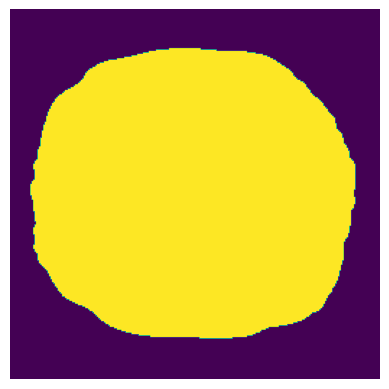

In [194]:
plt.axis('off')
plt.imshow(masked)

## v) Segmenting the Regions

In [195]:
dts = cv2.bitwise_and(imagem, imagem, mask=mask)
segmented = cv2.cvtColor(dts, cv2.COLOR_BGR2RGB)

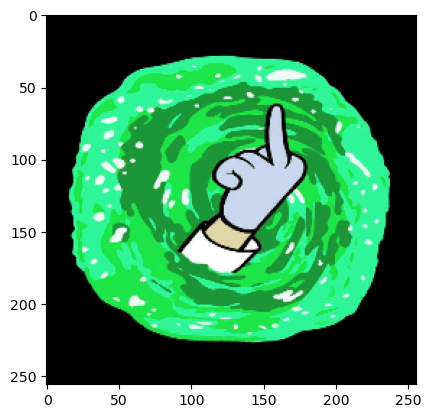

In [196]:
plt.imshow(segmented)